In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import pandas as pd
import math as m
import itertools
import os

# Load the degrees of repairability

In [8]:
iris_m_rep_qa, iris_m_rep_qf = np.load("output/repairability_iris_missing_(1-qa,1-qf).npy")
iris_o_rep_qa, iris_o_rep_qf = np.load("output/repairability_iris_outlier_(1-qa,1-qf).npy")
iris_m_o_rep_qa, iris_m_o_rep_qf = np.load("output/repairability_iris_missing_outlier_(1-qa,1-qf).npy")

cancer_m_rep_qa, cancer_m_rep_qf = np.load("output/repairability_cancer_missing_(1-qa,1-qf).npy")
cancer_o_rep_qa, cancer_o_rep_qf = np.load("output/repairability_cancer_outlier_(1-qa,1-qf).npy")
cancer_m_o_rep_qa, cancer_m_o_rep_qf = np.load("output/repairability_cancer_missing_outlier_(1-qa,1-qf).npy")

adult_m_rep_qa, adult_m_rep_qf = np.load("output/repairability_adult_missing_(1-qa,1-qf).npy")
adult_o_rep_qa, adult_o_rep_qf = np.load("output/repairability_adult_outlier_(1-qa,1-qf).npy")
adult_m_o_rep_qa, adult_m_o_rep_qf = np.load("output/repairability_adult_missing_outlier_(1-qa,1-qf).npy")

heart_m_rep_qa, heart_m_rep_qf = np.load("output/repairability_heart_missing_(1-qa,1-qf).npy")
heart_o_rep_qa, heart_o_rep_qf = np.load("output/repairability_heart_outlier_(1-qa,1-qf).npy")
heart_m_o_rep_qa, heart_m_o_rep_qf = np.load("output/repairability_heart_missing_outlier_(1-qa,1-qf).npy")

abalone_m_rep_qa, abalone_m_rep_qf = np.load("output/repairability_abalone_missing_(1-qa,1-qf).npy")
abalone_o_rep_qa, abalone_o_rep_qf = np.load("output/repairability_abalone_outlier_(1-qa,1-qf).npy")
abalone_m_o_rep_qa, abalone_m_o_rep_qf = np.load("output/repairability_abalone_missing_outlier_(1-qa,1-qf).npy")

statlog_m_rep_qa, statlog_m_rep_qf = np.load("output/repairability_statlog_missing_(1-qa,1-qf).npy")
statlog_o_rep_qa, statlog_o_rep_qf = np.load("output/repairability_statlog_outlier_(1-qa,1-qf).npy")
statlog_m_o_rep_qa, statlog_m_o_rep_qf = np.load("output/repairability_statlog_missing_outlier_(1-qa,1-qf).npy")

spambase_m_rep_qa, spambase_m_rep_qf = np.load("output/repairability_spambase_missing_(1-qa,1-qf).npy")
spambase_o_rep_qa, spambase_o_rep_qf = np.load("output/repairability_spambase_outlier_(1-qa,1-qf).npy")
spambase_m_o_rep_qa, spambase_m_o_rep_qf = np.load("output/repairability_spambase_missing_outlier_(1-qa,1-qf).npy")

bean_m_rep_qa, bean_m_rep_qf = np.load("output/repairability_bean_missing_(1-qa,1-qf).npy")
bean_o_rep_qa, bean_o_rep_qf = np.load("output/repairability_bean_outlier_(1-qa,1-qf).npy")
bean_m_o_rep_qa, bean_m_o_rep_qf = np.load("output/repairability_bean_missing_outlier_(1-qa,1-qf).npy")

missing


<IPython.core.display.Javascript object>


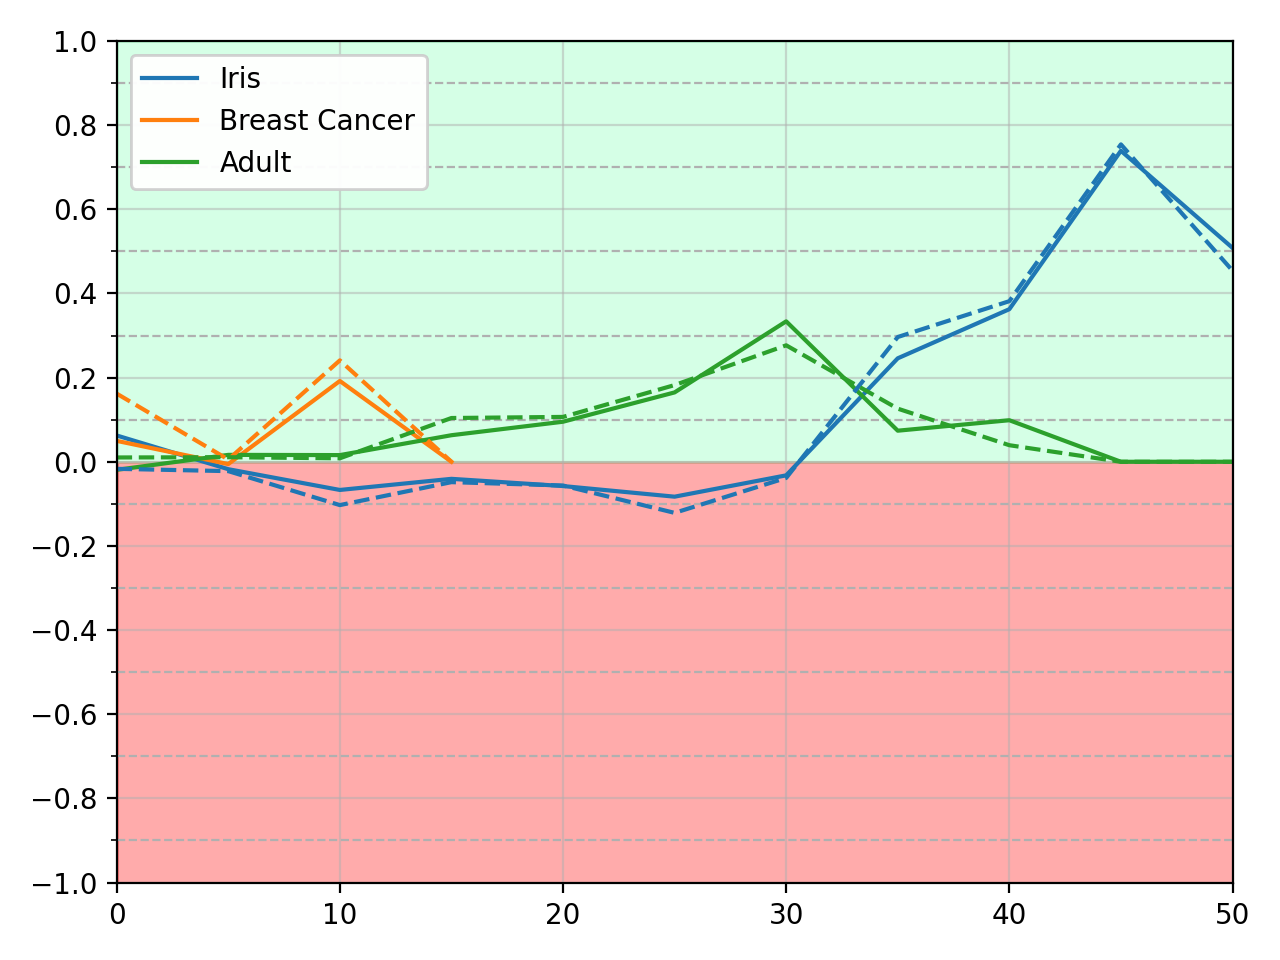

outliers


<IPython.core.display.Javascript object>


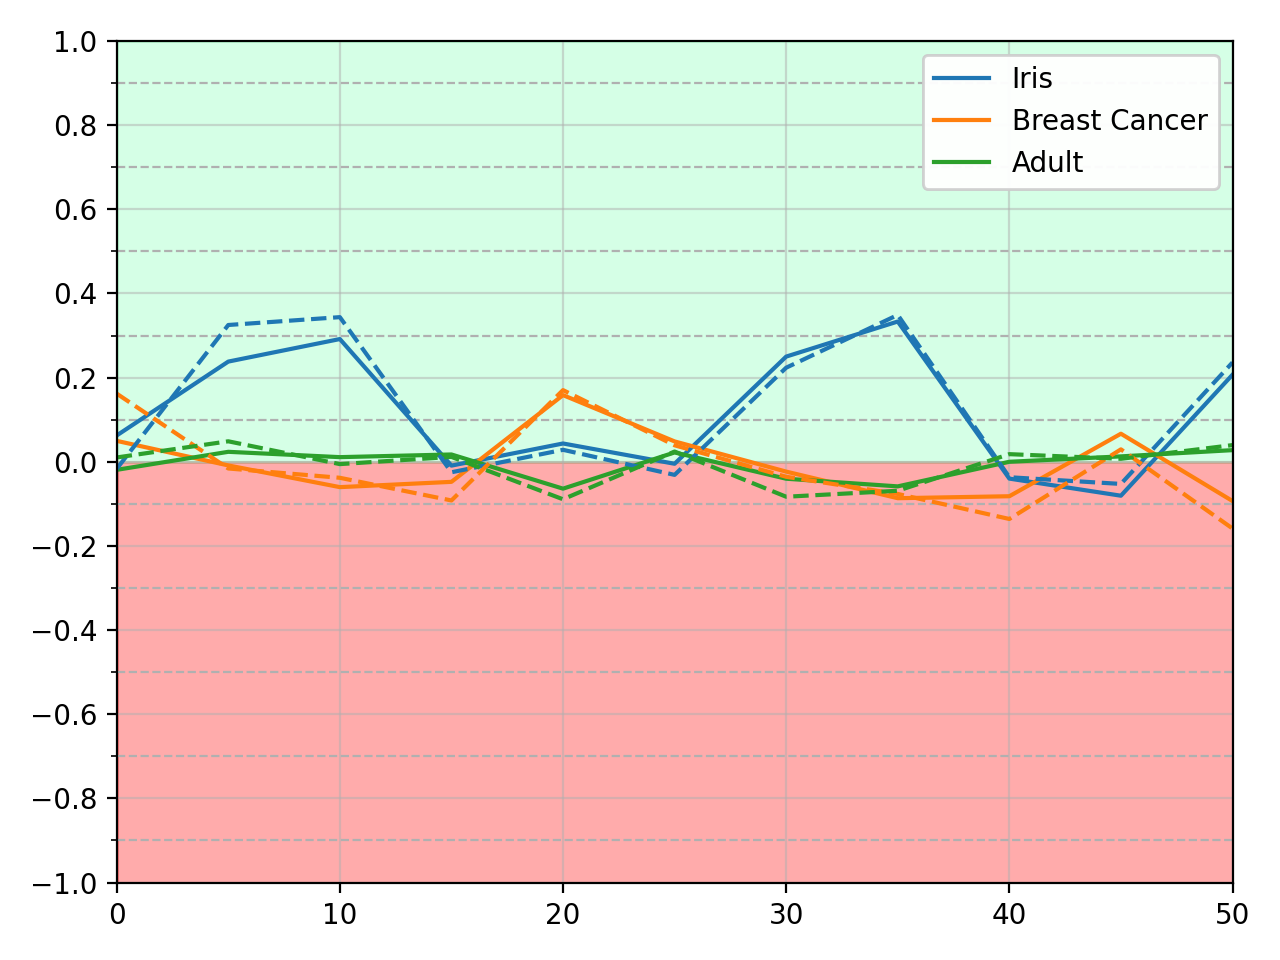

missing_and_outliers


<IPython.core.display.Javascript object>


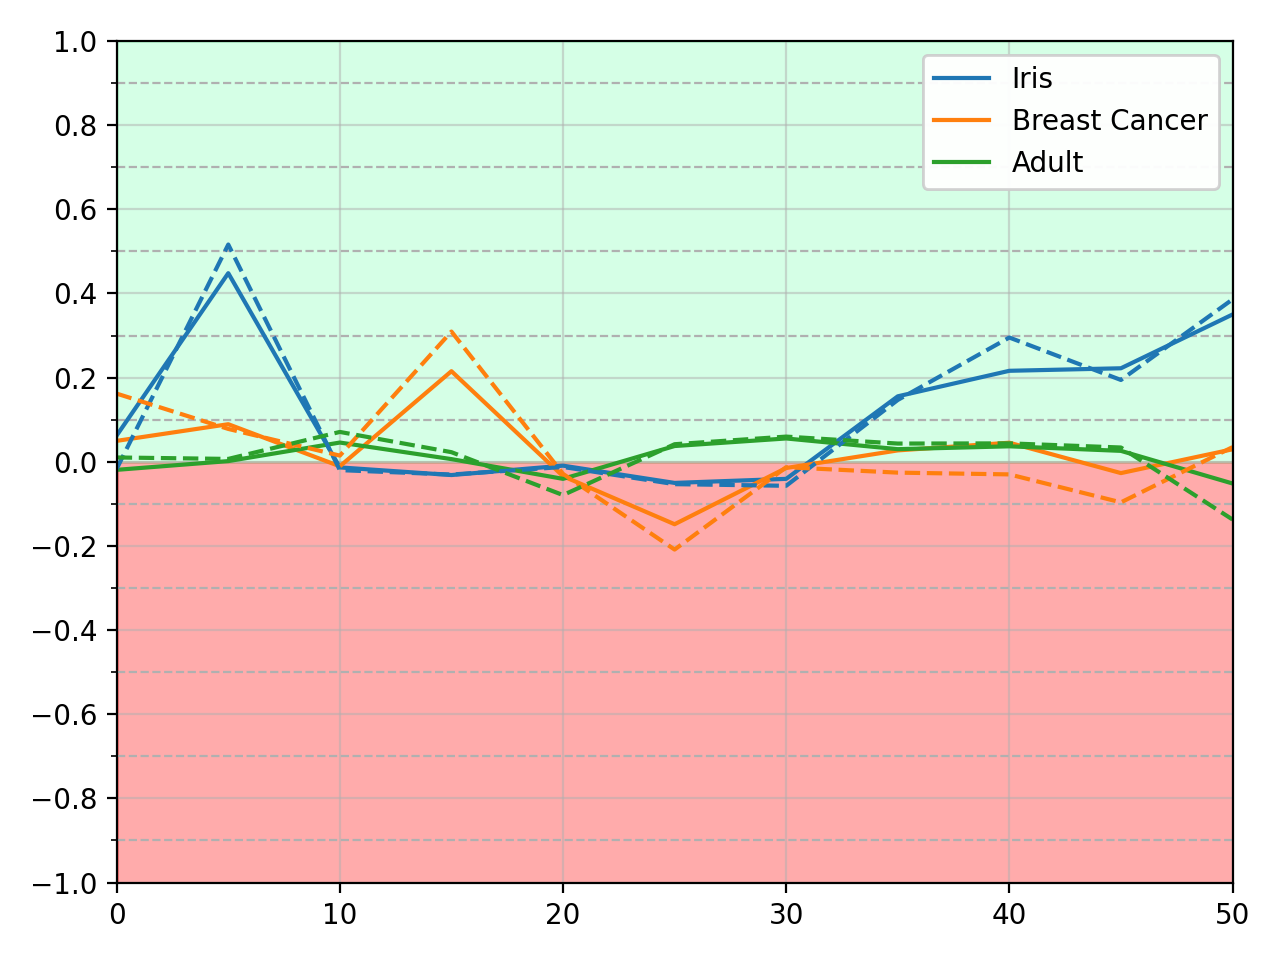

In [11]:
datasets = ['Iris', 'Breast Cancer', 'Adult']
line_colors = ['C0', 'C1', 'C2']
errors = ['missing', 'outliers', 'missing_and_outliers']

rep_m_qas = np.array([iris_m_rep_qa, cancer_m_rep_qa, adult_m_rep_qa])
rep_m_qfs = np.array([iris_m_rep_qf, cancer_m_rep_qf, adult_m_rep_qf])
rep_m = np.array([rep_m_qas, rep_m_qfs])
rep_o_qas = np.array([iris_o_rep_qa, cancer_o_rep_qa, adult_o_rep_qa])
rep_o_qfs = np.array([iris_o_rep_qf, cancer_o_rep_qf, adult_o_rep_qf])
rep_o = np.array([rep_o_qas, rep_o_qfs])
rep_m_o_qas = np.array([iris_m_o_rep_qa, cancer_m_o_rep_qa, adult_m_o_rep_qa])
rep_m_o_qfs = np.array([iris_m_o_rep_qf, cancer_m_o_rep_qf, adult_m_o_rep_qf])
rep_m_o = np.array([rep_m_o_qas, rep_m_o_qfs])
reps = np.array([rep_m, rep_o, rep_m_o])

x = np.array(range(0, 55, 5))
colors = cm.rainbow([1, 0.5])
zones = []
ys = [-1, 0]
for j in range(2):
    zones.append(patches.Rectangle((0, ys[j]), 50, 1, color=colors[j], alpha=0.33))

for error, rep in zip(errors, reps):
    print(error)
    fig, ax = plt.subplots()
    
    line1a, = plt.plot(x, rep[0, 0], color=line_colors[0])
    line2a, = plt.plot(x, rep[0, 1], color=line_colors[1])
    line3a, = plt.plot(x, rep[0, 2], color=line_colors[2])

    line1f, = plt.plot(x, rep[1, 0], '--', color=line_colors[0])
    line2f, = plt.plot(x, rep[1, 1], '--', color=line_colors[1])
    line3f, = plt.plot(x, rep[1, 2], '--', color=line_colors[2])
    
    plt.ylim([-1, 1])
    plt.xlim([0, 50])

    pc = PatchCollection(zones, match_original=True)
    ax.add_collection(pc)

    ymajor_ticks = np.arange(-10, 11, 2)/10
    yminor_ticks = np.arange(-10, 11, 1)/10
    ax.set_yticks(ymajor_ticks)
    ax.set_yticks(yminor_ticks, minor=True)
    ax.grid(which='minor', linestyle='--')

    legend1 = plt.legend([line1a, line2a, line3a], datasets)
    plt.gca().add_artist(legend1)
    plt.grid(alpha=0.5)
    fig.tight_layout()
    plt.show()

missing


<IPython.core.display.Javascript object>


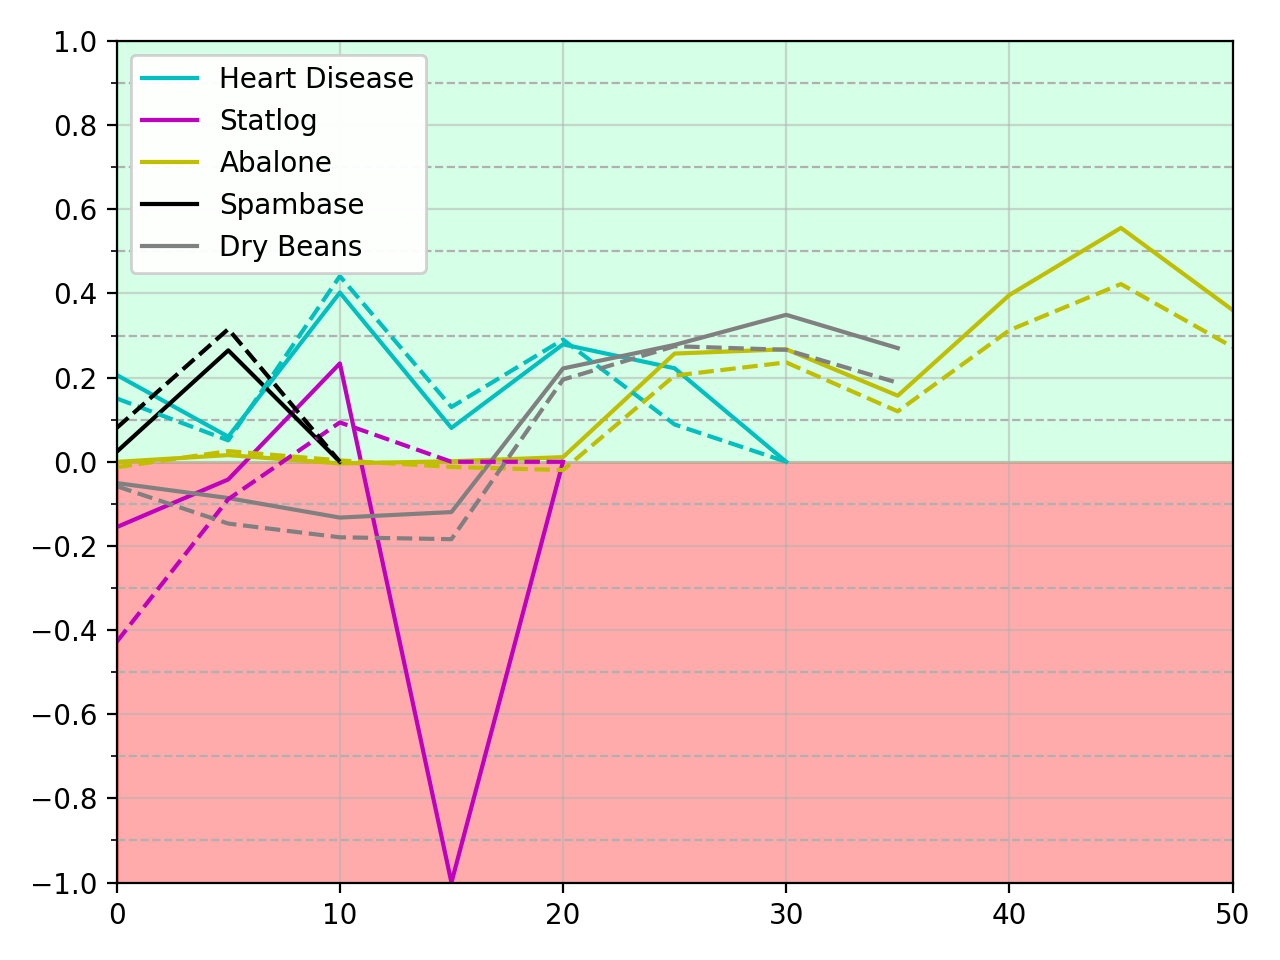

outliers


<IPython.core.display.Javascript object>


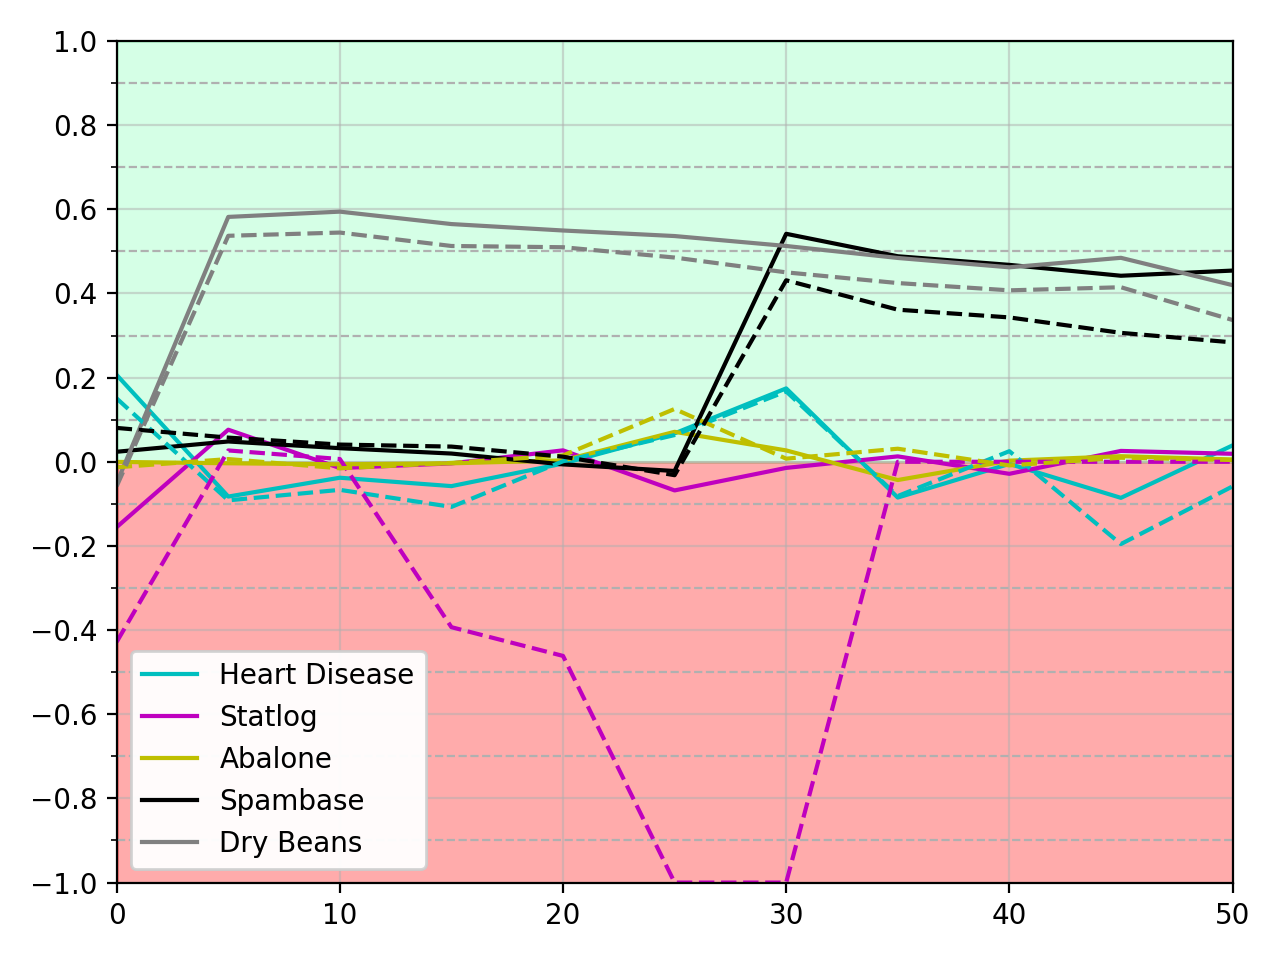

missing_and_outliers


<IPython.core.display.Javascript object>


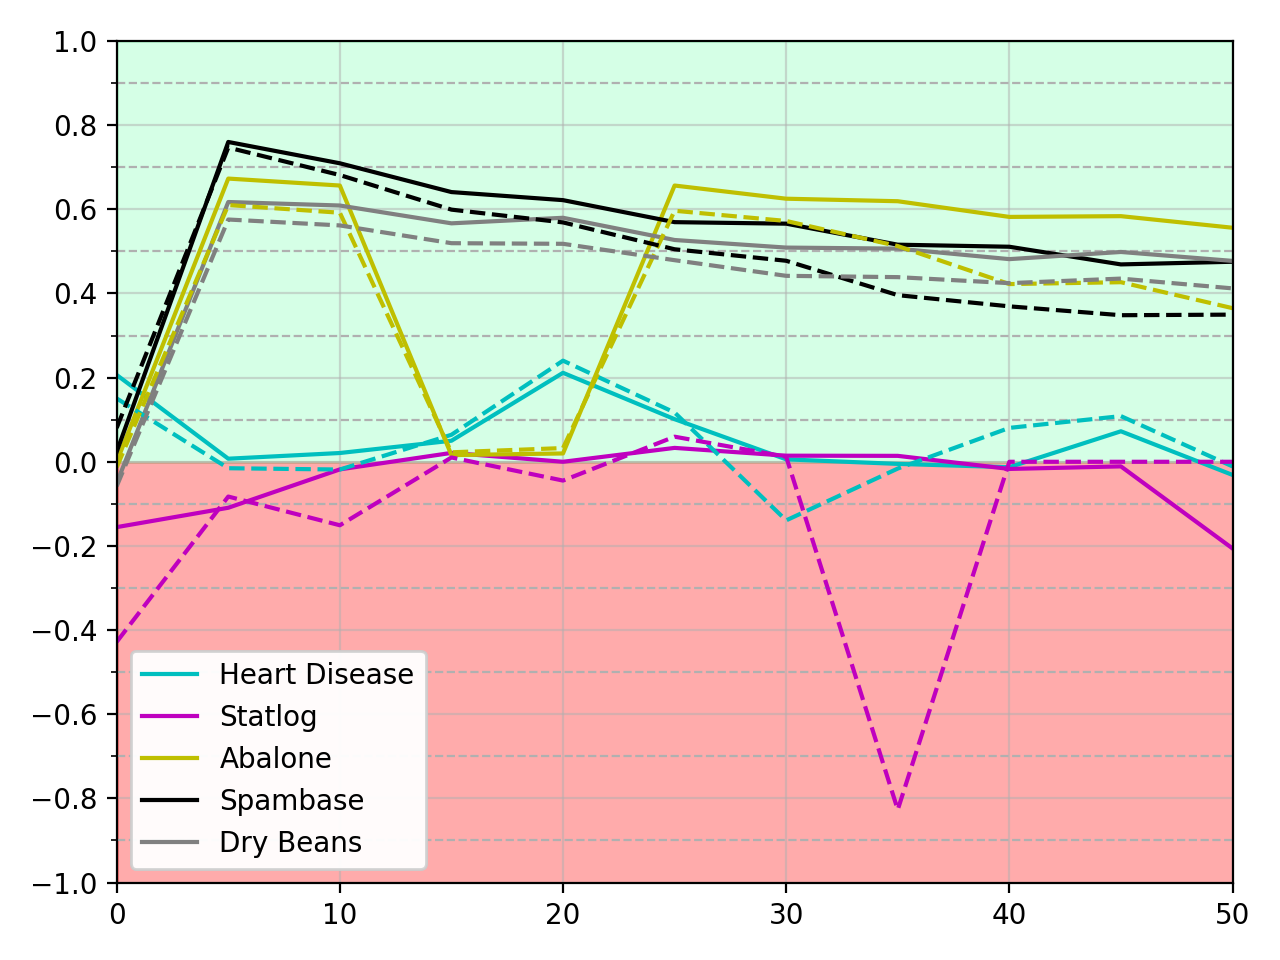

In [12]:
datasets = ['Heart Disease', 'Statlog', 'Abalone', 'Spambase', 'Dry Beans']
line_colors = ['c', 'm', 'y', 'k', '0.5']
errors = ['missing', 'outliers', 'missing_and_outliers']

rep_m_qas = np.array([heart_m_rep_qa, statlog_m_rep_qa, abalone_m_rep_qa, spambase_m_rep_qa, bean_m_rep_qa])
rep_m_qfs = np.array([heart_m_rep_qf, statlog_m_rep_qf, abalone_m_rep_qf, spambase_m_rep_qf, bean_m_rep_qf])
rep_m = np.array([rep_m_qas, rep_m_qfs])
rep_o_qas = np.array([heart_o_rep_qa, statlog_o_rep_qa, abalone_o_rep_qa, spambase_o_rep_qa, bean_o_rep_qa])
rep_o_qfs = np.array([heart_o_rep_qf, statlog_o_rep_qf, abalone_o_rep_qf, spambase_o_rep_qf, bean_o_rep_qf])
rep_o = np.array([rep_o_qas, rep_o_qfs])
rep_m_o_qas = np.array([heart_m_o_rep_qa, statlog_m_o_rep_qa, abalone_m_o_rep_qa, spambase_m_o_rep_qa, bean_m_o_rep_qa])
rep_m_o_qfs = np.array([heart_m_o_rep_qf, statlog_m_o_rep_qf, abalone_m_o_rep_qf, spambase_m_o_rep_qf, bean_m_o_rep_qf])
rep_m_o = np.array([rep_m_o_qas, rep_m_o_qfs])
reps = np.array([rep_m, rep_o, rep_m_o])

x = np.array(range(0, 55, 5))
colors = cm.rainbow([1, 0.5])
zones = []
for j in range(2):
    zones.append(patches.Rectangle((0, ys[j]), 50, 1, color=colors[j], alpha=0.33))

for error, rep in zip(errors, reps):
    print(error)
    fig, ax = plt.subplots()
    
    line1a, = plt.plot(x, rep[0, 0], color=line_colors[0])
    line2a, = plt.plot(x, rep[0, 1], color=line_colors[1])
    line3a, = plt.plot(x, rep[0, 2], color=line_colors[2])
    line4a, = plt.plot(x, rep[0, 3], color=line_colors[3])
    line5a, = plt.plot(x, rep[0, 4], color=line_colors[4])

    line1f, = plt.plot(x, rep[1, 0], '--', color=line_colors[0])
    line2f, = plt.plot(x, rep[1, 1], '--', color=line_colors[1])
    line3f, = plt.plot(x, rep[1, 2], '--', color=line_colors[2])
    line4f, = plt.plot(x, rep[1, 3], '--', color=line_colors[3])
    line5f, = plt.plot(x, rep[1, 4], '--', color=line_colors[4])
    
    plt.ylim([-1, 1])
    plt.xlim([0, 50])

    pc = PatchCollection(zones, match_original=True)
    ax.add_collection(pc)

    ymajor_ticks = np.arange(-10, 11, 2)/10
    yminor_ticks = np.arange(-10, 11, 1)/10
    ax.set_yticks(ymajor_ticks)
    ax.set_yticks(yminor_ticks, minor=True)
    ax.grid(which='minor', linestyle='--')

    legend1 = plt.legend([line1a, line2a, line3a, line4a, line5a], datasets)
    plt.gca().add_artist(legend1)
    plt.grid(alpha=0.5)
    fig.tight_layout()
    plt.show()